Rank r that captures 99% of total variance =  404
Rank r that captures 99% in Frobenius Norm =  828
Rank r that captures 99% of cumulative sum of singular values =  1005


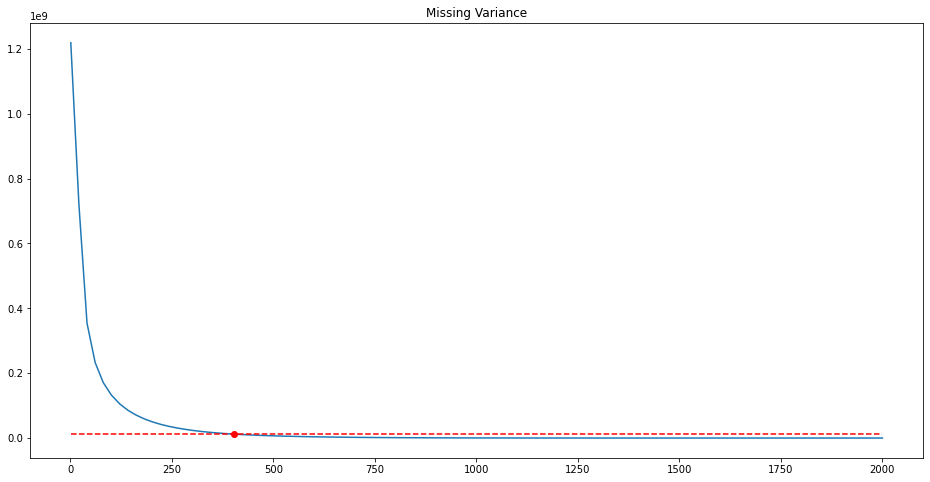

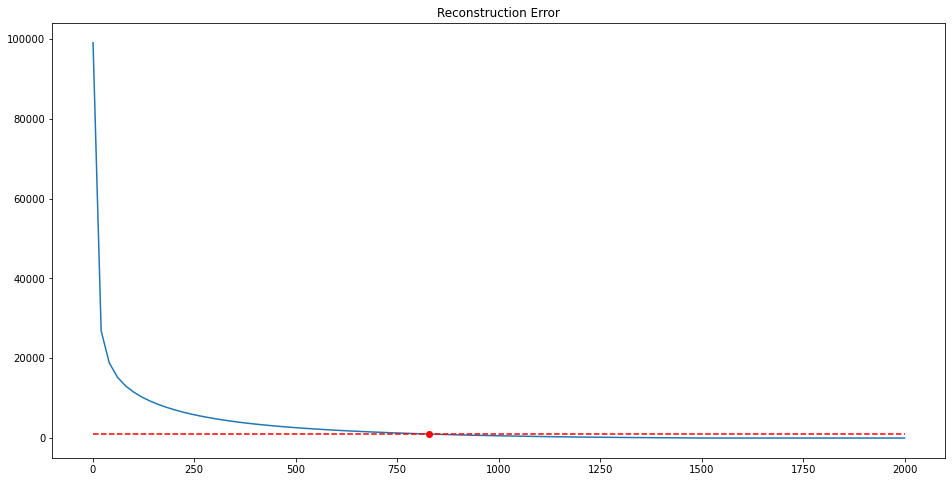

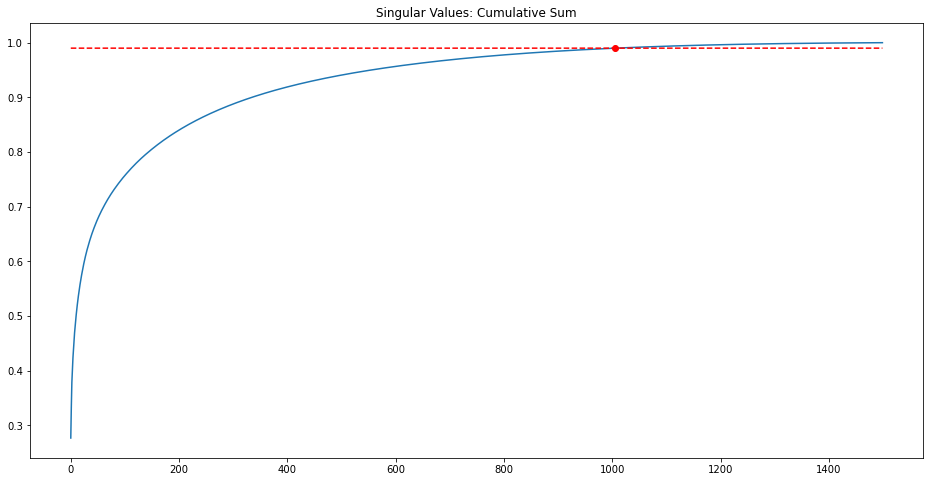

In [86]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]

A = imread(os.path.join('DATA','dog.jpg'))
X = np.mean(A,-1); # Convert RGB to grayscale

U, S, VT = np.linalg.svd(X,full_matrices=0)
S = np.diag(S)

n,m=U.shape

u=np.linspace(1,n,100,dtype=int)
err= np.zeros_like(u)

#Compute relative reconstruction errors as rank r goes from 1 to n
for i in range(u.shape[0]):
    err[i]=np.linalg.norm(X-(U[:,:u[i]] @ S[0:u[i],:u[i]] @ VT[:u[i],:]))
    
sq_err = np.square(err)
cumsum=np.cumsum(np.diag(S))/np.sum(np.diag(S))

percent_err = 0.01*np.max(err)
percent_sq_err = 0.01*np.max(sq_err)
percent_cumsum = 0.99*np.max(cumsum)

flat1 = percent_err*np.ones_like(u)
flat2 = percent_sq_err*np.ones_like(u)
flat3 = percent_cumsum*np.ones_like(cumsum)

err_rank = np.argmin(np.abs(np.array(err)-percent_err))
sq_err_rank=np.argmin(np.abs(np.array(sq_err)-percent_sq_err))
cumsum_rank=np.argmin(np.abs(np.array(cumsum)-percent_cumsum))

print("Rank r that captures 99% of total variance = ", u[sq_err_rank])
print("Rank r that captures 99% in Frobenius Norm = ", u[err_rank])
print("Rank r that captures 99% of cumulative sum of singular values = ", cumsum_rank)

plt.figure(1)
plt.title('Missing Variance')
plt.plot(u,sq_err)
plt.plot(u[sq_err_rank],sq_err[sq_err_rank],'-ro')
plt.plot(u,flat2,'r--')
plt.show()

plt.figure(2)
plt.title('Reconstruction Error')
plt.plot(u,err)
plt.plot(u[err_rank],err[err_rank],'-ro')
plt.plot(u,flat1,'r--')
plt.show()

plt.figure(3)
plt.plot(cumsum)
plt.title('Singular Values: Cumulative Sum')
plt.plot(cumsum_rank,cumsum[cumsum_rank],'-ro')
plt.plot(flat3,'r--')
plt.show()